# Importing The Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import time
import pandas as pd
from IPython.display import display

In [2]:
np.random.seed(42)

# Loading The Dataset

In [3]:
digits = load_digits()
X, y = digits.data, digits.target

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Feature dimension: {X.shape[1]}")

Dataset shape: (1797, 64)
Number of classes: 10
Feature dimension: 64


# Display Some Sample Images

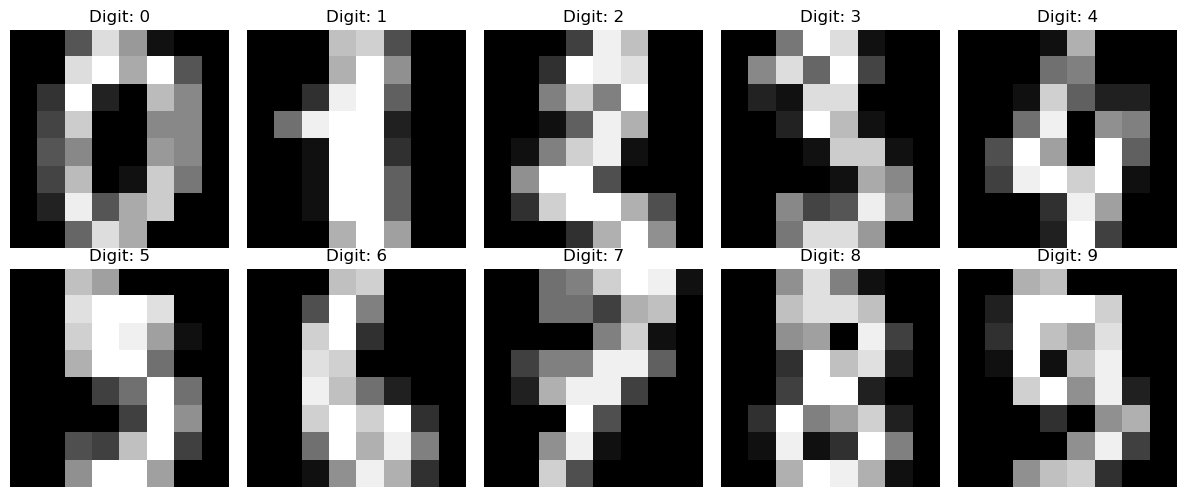

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Digit: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Splitting The Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1257
Test set size: 540


# Feature Scaling

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original data - Mean: {X_train.mean():.2f}, Std: {X_train.std():.2f}")
print(f"Scaled data - Mean: {X_train_scaled.mean():.2f}, Std: {X_train_scaled.std():.2f}")

Original data - Mean: 4.89, Std: 6.01
Scaled data - Mean: 0.00, Std: 0.97
